# Logistic Model

In [125]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = 100
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

In [126]:
df=pd.read_csv('transformed.csv')

In [127]:
df.head()

,Unnamed: 0,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,New_maritalstatus_Yes,CreditRating,Churn
0,0,-1.160580,-0.783685,-1.276518,-0.444774,-0.754292,-0.256130,-0.558645,-0.461939,-0.947937,-0.514034,-0.859058,-0.681673,-0.490104,-0.117996,-1.205704,-0.876154,-0.378157,-0.675917,-0.392055,-0.464100,2.108370,0.265315,-0.818300,0.130266,0.343160,-0.073884,0.070426,-0.883867,-0.572264,-0.102378,-0.553165,1.315425,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,3,1
1,1,-1.488361,-1.558803,-1.581047,-0.721787,-0.754292,-0.256130,0.029331,0.030061,-1.052171,-0.684813,-1.060799,-0.681673,-0.490104,-1.166591,-1.205704,-0.876154,-1.283919,-1.214554,-0.392055,-0.610991,2.016572,-0.687563,-0.818300,0.130266,-0.998903,2.404823,-0.787982,-0.883867,-0.572264,0.220233,-0.553165,-0.148322,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,1
2,2,-0.602404,-1.567202,-0.406192,-0.721787,-0.754292,-0.256130,0.037109,0.030061,-1.133754,-0.684813,-1.224658,-0.681673,-0.490104,-1.160676,-1.185222,-0.876154,-1.361552,-1.144059,-0.392055,-0.610991,2.078213,-0.687563,-0.818300,-0.963680,-0.998903,2.811137,-0.787982,-0.883867,-0.572264,0.562858,-0.553165,-1.650029,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,2,0
3,3,0.406812,0.840653,0.957636,0.123980,-0.754292,-0.256130,0.662769,0.231433,0.956226,0.207226,0.627948,0.249774,0.227656,0.357155,1.244885,0.636395,1.328215,0.858817,-0.392055,0.351607,2.047619,0.265315,0.508156,1.024514,0.832384,0.286876,-0.787982,-0.883867,-0.572264,0.562858,-0.553165,-1.214162,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
4,4,-1.481005,-1.600985,-1.581047,-0.721787,-0.754292,-0.256130,0.044890,0.025025,-1.133754,-0.684813,-1.224658,-0.681673,-0.490104,-1.166591,-1.205704,-0.876154,-1.389289,-1.241170,-0.392055,-0.610991,1.853948,0.265315,0.508156,0.700396,0.680032,1.306178,-0.787982,-0.883867,-0.572264,1.682612,0.061017,0.547631,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,1


In [128]:
y=df['Churn']

In [129]:
x=df.drop(columns=['Churn','Unnamed: 0'])

In [130]:
import statsmodels.api as sm

In [131]:
xc=sm.add_constant(x)

In [132]:
from sklearn.model_selection import train_test_split


In [133]:
x_train,x_test,y_train,y_test=train_test_split(xc,y, test_size=0.3,random_state=0)
# print dimension of train set
print('X_train', x_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_train (35475, 60)
y_train (35475,)
X_test (15204, 60)
y_test (15204,)


In [134]:
# build the model on train data (x_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train,x_train).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: 0.577415
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                35475
Model:                          Logit   Df Residuals:                    35415
Method:                           MLE   Df Model:                           59
Date:                Tue, 27 Dec 2022   Pseudo R-squ.:                 0.03218
Time:                        10:23:01   Log-Likelihood:                -20484.
converged:                      False   LL-Null:                       -21165.
Covariance Type:            nonrobust   LLR p-value:                5.454e-246
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8105        nan        nan        nan         nan         nan
MonthlyRevenue

In [144]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

13069   0.381680
21341   0.336847
31710   0.262984
6237    0.131585
2782    0.199097
dtype: float64

In [161]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [146]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

### confusion matrix

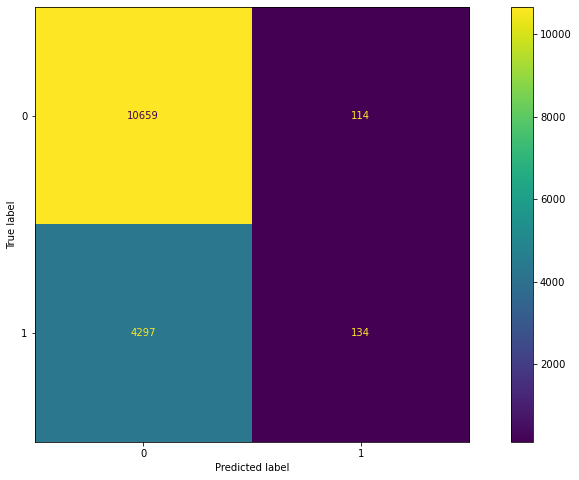

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83     10773
           1       0.54      0.03      0.06      4431

    accuracy                           0.71     15204
   macro avg       0.63      0.51      0.44     15204
weighted avg       0.66      0.71      0.60     15204



### scores for different cut-off

In [149]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [154]:
# consider a list of values for cut-off
cutoff = [0.1, 0.15, 0.2, 0.27, 0.3, 0.35, 0.4]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [155]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.501590,0.292096,0.997517,0.294725,0.001859,0.451873
1,0.100000,0.501590,0.292096,0.997517,0.294725,0.001859,0.451873
2,0.100000,0.501590,0.292096,0.997517,0.294725,0.001859,0.451873
3,0.150000,0.517890,0.299186,0.978786,0.325638,0.021443,0.458287
4,0.150000,0.517890,0.299186,0.978786,0.325638,0.021443,0.458287
5,0.150000,0.517890,0.299186,0.978786,0.325638,0.021443,0.458287
6,0.200000,0.547673,0.314922,0.905890,0.398250,0.061420,0.467369
7,0.200000,0.547673,0.314922,0.905890,0.398250,0.061420,0.467369
8,0.200000,0.547673,0.314922,0.905890,0.398250,0.061420,0.467369
9,0.250000,0.582277,0.344974,0.751298,0.511773,0.122190,0.472836


In [162]:
 y_pred = [ 0 if x < 0.27 else 1 for x in y_pred_prob]

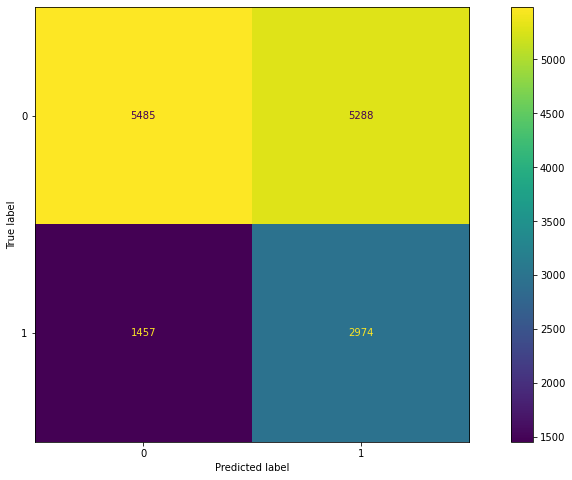

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62     10773
           1       0.36      0.67      0.47      4431

    accuracy                           0.56     15204
   macro avg       0.58      0.59      0.54     15204
weighted avg       0.66      0.56      0.58     15204



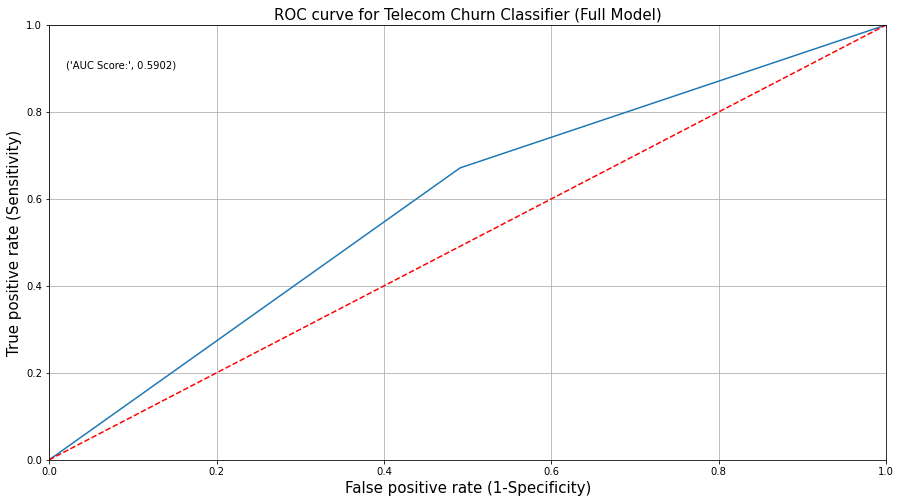

In [160]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Telecom Churn Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

### Interpretation: 
The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.5901.

In [165]:
dict1={'Recall_score churners':[0.67,0.14,0.06],
      'accuracy':[0.56,0.74,0.71],
      'Auc_score':[0.59,0.55,0.52]}

In [166]:
model_scores=pd.DataFrame(dict1,index=['Logistic_Regression','Decision_Tree','Random_Forest'])

In [167]:
model_scores

,Recall_score churners,accuracy,Auc_score
Logistic_Regression,0.670000,0.560000,0.590000
Decision_Tree,0.140000,0.740000,0.550000
Random_Forest,0.060000,0.710000,0.520000
